In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

from src.data import io
from src.visualization import visualize

In [4]:
species = "Corn"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Corn - train_dir: ../data/processed/Corn - metadata_file_path: ../data/processed/Corn/metadata.json


In [5]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: f2fe0505-be44-4162-be1a-2f9258fb4537


## Training

In [6]:
from src.models.train_model import train, load_dataset

In [14]:
start_time = datetime.utcnow().strftime("%Y-%m-%d__%H_%M")
batch_size = 32
epochs = 20
monitor = "val_loss"

In [ ]:
classifier, history, _ = train(str(train_dir), str(model_dir), batch_size, epochs, monitor, start_time)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)       

## Evaluation

In [10]:
model_metadata_file_path = model_dir.joinpath(model_id, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [12]:
history = model_metadata["history"]

In [13]:
metrics_df = visualize.create_metrics_dataframe(history)

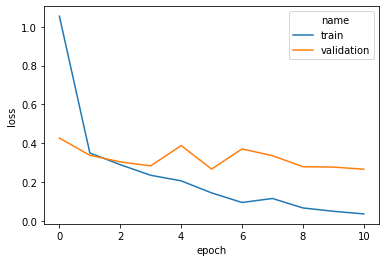

In [15]:
loss_plot = visualize.learning_curves("loss", metrics_df)

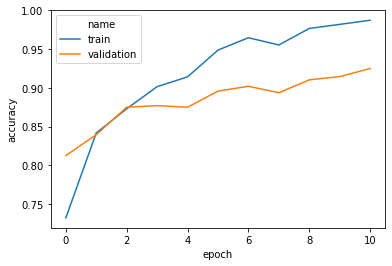

In [16]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)